# Trabalho de Sinais

# Alunos:
# Gabriel Teixeira Patrício - 20170170889
# Thiago Gomes - 
# Claudio de Souza Brito - 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
import random
import sys
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from PIL import Image 


In [31]:
def DE(row):
    """
    A simple euclidean distance function
    """
    soma = 0
    for x in distance_columns:
        soma += (row[x] - selected_player[x]) ** 2
    return math.sqrt(soma)

# Primeiro passo, estabelecer o tamanho de arquivos que temos e o número de fotos de cada pessoa na qual pertence o arquivo

In [32]:
num_file = 40
num_photo = 10

In [33]:
#carregando as imagens

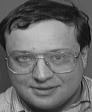

In [34]:
# Python program to read 
# image using PIL module 
  
# importing PIL 
treinee = []
person = []

for pasta in range(num_file):
    fot_alea = random.randrange(num_photo)   
    for foto in range(num_photo):
        if foto == fot_alea:
            person.append(Image.open(f'orl_faces/s{pasta+1}/{foto+1}.pgm'))
        else:
            treinee.append(Image.open(f'orl_faces/s{pasta+1}/{foto+1}.pgm'))
  
# Output Images 
# Separando o treinamento das entradas

person[30]

In [35]:
#analisando as fotos

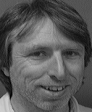

In [36]:
person[38]

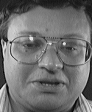

In [37]:
p = 30
f = 8
treinee[p*9+f]

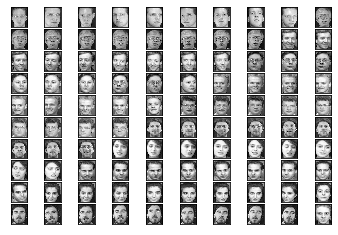

In [38]:
nrows, ncols = 10, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(treinee[i-1 + j], cmap = 'gray')
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

In [39]:
np.array(treinee[38*9+0])

array([[ 83,  86,  84, ...,  74,  72,  75],
       [ 84,  84,  84, ...,  75,  74,  75],
       [ 83,  85,  82, ...,  73,  76,  74],
       ...,
       [194, 193, 193, ..., 137, 134, 133],
       [193, 195, 192, ..., 135, 135, 134],
       [194, 194, 194, ..., 136, 138, 134]], dtype=uint8)

In [40]:
treinee_tam = len(treinee)
print(treinee_tam)

360


In [41]:
(largura, comprimento) = np.array(treinee[0].size)

print(largura, comprimento)

92 112


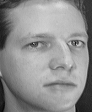

In [42]:
treinee[4]

In [43]:
#Fourier

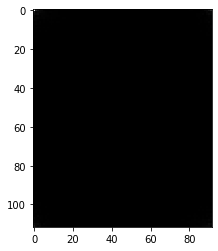

In [44]:
treinee_f=[]

for pasta in range(treinee_tam):
        treinee_f.append(np.fft.fft2(treinee[pasta]))
    
plt.imshow(np.abs(treinee_f[8]), cmap = 'gray')

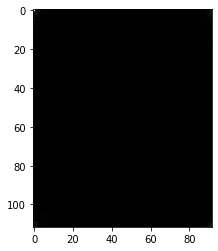

In [45]:
person_f=[]

for pasta in range(num_file):
    person_f.append(np.fft.fft2(person[pasta]))
    
plt.imshow(np.abs(person_f[8]), cmap = 'gray')

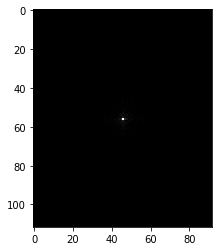

In [46]:
treinee_fourier=[]

for pasta in range(treinee_tam):
        treinee_fourier.append(np.fft.fftshift(treinee_f[pasta]))
        
plt.imshow(np.abs(treinee_fourier[0]), cmap = 'gray')

In [47]:
len(treinee_fourier)

360

In [ ]:
# for i in range(len(treinee_fourier)):
    #treinee_fourier[i] = 20*np.log(np.abs(treinee_fourier[i]))
    
#plt.imshow(np.abs(treinee_fourier[0]), cmap = 'gray')

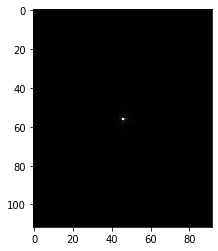

In [48]:
person_fourier = []
for pasta in range(num_file):
    person_fourier.append(np.fft.fftshift(person_f[pasta]))
    
plt.imshow(np.abs(person_fourier[0]), cmap = 'gray')

In [ ]:
# for i in range(len(person_fourier)):  #erro
    #person_fourier[i] = 20*np.log(np.abs(person_fourier[i]))
    
#plt.imshow(np.abs(person_fourier[0]), cmap = 'gray')

In [49]:
np.array(treinee_fourier).shape

(360, 112, 92)

In [50]:
treinee_fourier[0]

array([[ 113.        -1.88737914e-15j,  239.57476971+4.05221803e+02j,
         -34.84026581+4.52691610e+02j, ...,
        -174.15729161-2.43096432e+02j,  -34.84026581-4.52691610e+02j,
         239.57476971-4.05221803e+02j],
       [-238.91973119-2.19477792e+02j, -147.5243893 -1.40462380e+02j,
        -181.55605059+1.09223801e+02j, ...,
          43.35606421+3.38519708e+02j, -260.89332439+1.08491914e+02j,
        -511.9490309 -2.23772277e+02j],
       [ -86.44380407-7.26947646e+01j,  -85.6511844 -2.27174055e+02j,
        -120.28381058+1.28027981e+02j, ...,
         290.04525342-2.33063941e+02j, -150.42741784-1.72194291e+02j,
        -110.89841987+1.89484889e+02j],
       ...,
       [ 404.13831378-2.32476892e+02j,  578.74692721-3.40506694e+02j,
         260.01671305+1.36480041e+02j, ...,
         503.17982587+1.49487589e+02j,   62.27840465-2.28689724e+02j,
        -126.64683811+1.33839484e+02j],
       [ -86.44380407+7.26947646e+01j, -110.89841987-1.89484889e+02j,
        -150.42741784+

In [51]:
def zoom(n, image):
    
    # centro da imagem
    x = comprimento//2
    y = largura//2

    r = n//2
    
    imp = 0
    if n % 2 != 0:
        imp = -1
    
    
    return image[x-r+imp:x+r,y-r+imp:y+r]

In [52]:
#def image_to_feature_vector(image, size=(32, 32)): 
    # redimensione a imagem para um tamanho fixo e aplique a imagem em
    # uma lista de intensidades brutas de pixels
    #return cv2.resize(image, size).flatten()

In [53]:
y_train = []
y_true = []
for pasta in range(num_file):
    y_true.append(pasta)
    for foto in range(num_photo-1):
        y_train.append(pasta)

# Apenas real

In [54]:

for tam in range(2, 51):    
    #dimensão da imagem
    #novo vector
    treinee_mini = []
    person_mini = []
    y_predict = []
    scores = []
    scores_num = []

    #jogar na função
    for image in treinee_fourier:
        treinee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(treinee_mini)

    classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier.fit(x_train.real, y_train)
    

    for image in person_mini:
        y_predict.append(classifier.predict([image.real]))

    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    #casting to transform the array in np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))
    
    #print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))


Acerto do teste com a foto 2x2: 82.50%
Acerto do teste com a foto 2x2: [33] pessoas
Erro do teste com a foto 2x2: 17.50%

Acerto do teste com a foto 3x3: 95.00%
Acerto do teste com a foto 3x3: [38] pessoas
Erro do teste com a foto 3x3: 5.00%

Acerto do teste com a foto 4x4: 97.50%
Acerto do teste com a foto 4x4: [39] pessoas
Erro do teste com a foto 4x4: 2.50%

Acerto do teste com a foto 5x5: 97.50%
Acerto do teste com a foto 5x5: [39] pessoas
Erro do teste com a foto 5x5: 2.50%

Acerto do teste com a foto 6x6: 95.00%
Acerto do teste com a foto 6x6: [38] pessoas
Erro do teste com a foto 6x6: 5.00%

Acerto do teste com a foto 7x7: 95.00%
Acerto do teste com a foto 7x7: [38] pessoas
Erro do teste com a foto 7x7: 5.00%

Acerto do teste com a foto 8x8: 97.50%
Acerto do teste com a foto 8x8: [39] pessoas
Erro do teste com a foto 8x8: 2.50%

Acerto do teste com a foto 9x9: 97.50%
Acerto do teste com a foto 9x9: [39] pessoas
Erro do teste com a foto 9x9: 2.50%

Acerto do teste com a foto 10x

# Apenas imaginário

In [55]:

for tam in range(2, 51):    
    #dimensão da imagem
    #novo vector
    treinee_mini = []
    person_mini = []
    y_predict = []
    scores = []
    scores_num = []

    #jogar na função
    for image in treinee_fourier:
        treinee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(treinee_mini)

    classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier.fit(x_train.imag, y_train)  

    for image in person_mini:
        y_predict.append(classifier.predict([image.imag]))

    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    #casting to transform the array in np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))
    
    #print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))


Acerto do teste com a foto 2x2: 50.00%
Acerto do teste com a foto 2x2: [20] pessoas
Erro do teste com a foto 2x2: 50.00%

Acerto do teste com a foto 3x3: 87.50%
Acerto do teste com a foto 3x3: [35] pessoas
Erro do teste com a foto 3x3: 12.50%

Acerto do teste com a foto 4x4: 85.00%
Acerto do teste com a foto 4x4: [34] pessoas
Erro do teste com a foto 4x4: 15.00%

Acerto do teste com a foto 5x5: 92.50%
Acerto do teste com a foto 5x5: [37] pessoas
Erro do teste com a foto 5x5: 7.50%

Acerto do teste com a foto 6x6: 92.50%
Acerto do teste com a foto 6x6: [37] pessoas
Erro do teste com a foto 6x6: 7.50%

Acerto do teste com a foto 7x7: 92.50%
Acerto do teste com a foto 7x7: [37] pessoas
Erro do teste com a foto 7x7: 7.50%

Acerto do teste com a foto 8x8: 92.50%
Acerto do teste com a foto 8x8: [37] pessoas
Erro do teste com a foto 8x8: 7.50%

Acerto do teste com a foto 9x9: 92.50%
Acerto do teste com a foto 9x9: [37] pessoas
Erro do teste com a foto 9x9: 7.50%

Acerto do teste com a foto 1

# Real + Imaginário

In [56]:

for tam in range(2, 51):    
    #dimensão da imagem
    #novo vector
    treinee_mini = []
    person_mini = []
    y_predict = []
    scores = []
    scores_num = []

    #jogar na função
    for image in treinee_fourier:
        treinee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(treinee_mini)

    classifier = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier.fit(x_train.real+x_train.imag, y_train)

    for image in person_mini:
        y_predict.append(classifier.predict([image.real+image.imag]))
        
    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)
    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))


Acerto do teste com a foto 2x2: 62.50%
Acerto do teste com a foto 2x2: [25] pessoas
Erro do teste com a foto 2x2: 37.50%

Acerto do teste com a foto 3x3: 87.50%
Acerto do teste com a foto 3x3: [35] pessoas
Erro do teste com a foto 3x3: 12.50%

Acerto do teste com a foto 4x4: 97.50%
Acerto do teste com a foto 4x4: [39] pessoas
Erro do teste com a foto 4x4: 2.50%

Acerto do teste com a foto 5x5: 95.00%
Acerto do teste com a foto 5x5: [38] pessoas
Erro do teste com a foto 5x5: 5.00%

Acerto do teste com a foto 6x6: 95.00%
Acerto do teste com a foto 6x6: [38] pessoas
Erro do teste com a foto 6x6: 5.00%

Acerto do teste com a foto 7x7: 95.00%
Acerto do teste com a foto 7x7: [38] pessoas
Erro do teste com a foto 7x7: 5.00%

Acerto do teste com a foto 8x8: 95.00%
Acerto do teste com a foto 8x8: [38] pessoas
Erro do teste com a foto 8x8: 5.00%

Acerto do teste com a foto 9x9: 95.00%
Acerto do teste com a foto 9x9: [38] pessoas
Erro do teste com a foto 9x9: 5.00%

Acerto do teste com a foto 10

# real e imaginaria

In [70]:

for tam in range(2, 51):    
    #dimensão da imagem
    #novo vector
    treinee_mini = []
    person_mini = []
    y_predict = []
    scores = []
    scores_num = []

    #jogar na função
    for image in treinee_fourier:
        treinee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(treinee_mini)

    classifier_real = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier_imag = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier_real_imag = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    classifier_imag_real = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    
    classifier_real.fit(x_train.real, y_train)
    classifier_imag.fit(x_train.imag, y_train)
    classifier_real_imag.fit(x_train.real, y_train)
    classifier_imag_real.fit(x_train.imag, y_train)

    for image in person_mini:
        y_predict_real=(classifier_real.predict([image.real]))
        y_predict_imag=(classifier_imag.predict([image.imag]))
        y_predict_real_imag=(classifier_real_imag.predict([image.imag]))
        y_predict_imag_real=(classifier_imag_real.predict([image.real]))
    
        menor_distancia = [y_predict_real, y_predict_imag, y_predict_real_imag, y_predict_imag_real]
        me = sorted(menor_distancia)[0]
        y_predict.append(me)
    
    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    #casting to transform the array in np_array
    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))
    
    #print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))


Acerto do teste com a foto 2x2: 42.50%
Acerto do teste com a foto 2x2: [17] pessoas
Erro do teste com a foto 2x2: 57.50%

Acerto do teste com a foto 3x3: 57.50%
Acerto do teste com a foto 3x3: [23] pessoas
Erro do teste com a foto 3x3: 42.50%

Acerto do teste com a foto 4x4: 42.50%
Acerto do teste com a foto 4x4: [17] pessoas
Erro do teste com a foto 4x4: 57.50%

Acerto do teste com a foto 5x5: 35.00%
Acerto do teste com a foto 5x5: [14] pessoas
Erro do teste com a foto 5x5: 65.00%

Acerto do teste com a foto 6x6: 47.50%
Acerto do teste com a foto 6x6: [19] pessoas
Erro do teste com a foto 6x6: 52.50%

Acerto do teste com a foto 7x7: 42.50%
Acerto do teste com a foto 7x7: [17] pessoas
Erro do teste com a foto 7x7: 57.50%

Acerto do teste com a foto 8x8: 30.00%
Acerto do teste com a foto 8x8: [12] pessoas
Erro do teste com a foto 8x8: 70.00%

Acerto do teste com a foto 9x9: 25.00%
Acerto do teste com a foto 9x9: [10] pessoas
Erro do teste com a foto 9x9: 75.00%

Acerto do teste com a f

# Merge

In [58]:
for tam in range(2, 51):    
    #dimensão da imagem
    #novo vector
    treinee_mini = []
    person_mini = []
    y_predict = []
    scores = []
    scores_num = []

    #jogar na função
    for image in treinee_fourier:
        treinee_mini.append(np.array(zoom(tam, image)).flatten())
    for image in person_fourier:
        person_mini.append(np.array(zoom(tam, image)).flatten())

    x_train = np.array(treinee_mini)

    classifier_ab = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
    
    ab = abs(x_train)
    classifier_ab.fit(ab, y_train)

    for image in person_mini:
        y_predict.append(classifier_ab.predict([abs(image)]))
    
    accuracy = accuracy_score(y_true, y_predict)
    accuracy_num = accuracy_score(y_true, y_predict, normalize=False)
    scores.append(accuracy)
    scores_num.append(accuracy_num)

    y_predict = np.array(y_predict)

    print("\nAcerto do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), np.mean(scores)*100))
    print("Acerto do teste com a foto {}x{}: {} pessoas".format((tam), (tam), scores_num))
    print("Erro do teste com a foto {}x{}: {:.2f}%".format((tam), (tam), (1-np.mean(scores))*100))
    
    #print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))


Acerto do teste com a foto 2x2: 77.50%
Acerto do teste com a foto 2x2: [31] pessoas
Erro do teste com a foto 2x2: 22.50%

Acerto do teste com a foto 3x3: 90.00%
Acerto do teste com a foto 3x3: [36] pessoas
Erro do teste com a foto 3x3: 10.00%

Acerto do teste com a foto 4x4: 95.00%
Acerto do teste com a foto 4x4: [38] pessoas
Erro do teste com a foto 4x4: 5.00%

Acerto do teste com a foto 5x5: 95.00%
Acerto do teste com a foto 5x5: [38] pessoas
Erro do teste com a foto 5x5: 5.00%

Acerto do teste com a foto 6x6: 97.50%
Acerto do teste com a foto 6x6: [39] pessoas
Erro do teste com a foto 6x6: 2.50%

Acerto do teste com a foto 7x7: 97.50%
Acerto do teste com a foto 7x7: [39] pessoas
Erro do teste com a foto 7x7: 2.50%

Acerto do teste com a foto 8x8: 100.00%
Acerto do teste com a foto 8x8: [40] pessoas
Erro do teste com a foto 8x8: 0.00%

Acerto do teste com a foto 9x9: 100.00%
Acerto do teste com a foto 9x9: [40] pessoas
Erro do teste com a foto 9x9: 0.00%

Acerto do teste com a foto 